<h1><center>Google Play Store</center></h1>
<center>An exploratory data analysis (EDA) was performed on a dataset of Google Play Store apps to study underlying patterns. Subsequently, K-means clustering was applied to group the apps into four clusters based on features such as "Rating" and "Installs." Each cluster represents apps with similar characteristics, and the analysis provides valuable insights into different app segments, their user ratings, and installation trends. The findings can be leveraged for app recommendations, market segmentation, and targeted marketing strategies, enhancing the understanding of the app ecosystem on the Google Play Store.</center>

#### Importing necessary Libraries

In [1]:

import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#### Reading data 

In [2]:
df = pd.read_csv(r"Z:\Projects\googleplaystore.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### EDA

In [3]:
#Checking for non null values and data type of all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


This dataset comprises information on 10,841 apps available on the Google Play Store. It includes details such as app ratings, number of installations, number of reviews, app size, content ratings, genres, and more. Note that,`Size,installs, Price should be numeric type


#### Category

In [4]:
df['Category'].value_counts ()


Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

There is one anomaly with Category = 1.9. Lets drop this row

In [5]:
df.drop(df.loc[df['Category']=='1.9'].index,inplace=True)


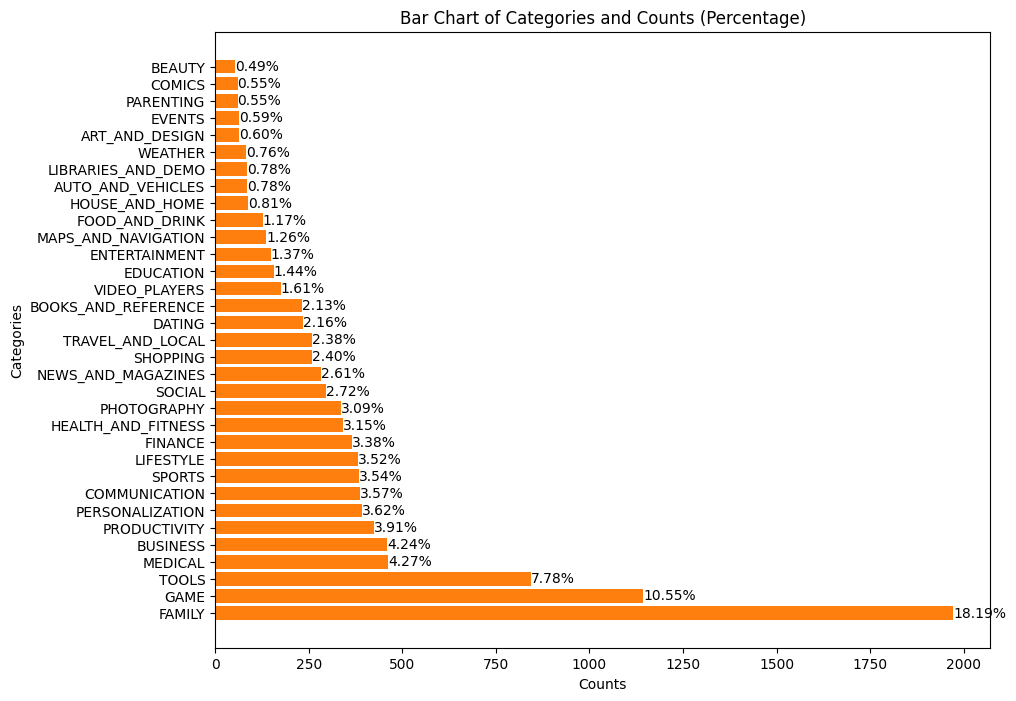

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming "categories" is the column name in your DataFrame
categories_counts = df['Category'].value_counts()

# Calculate the total count to calculate percentages
total_counts = categories_counts.sum()

# Sort the categories_counts in descending order by counts
categories_counts = categories_counts.sort_values(ascending=False)

# Calculate the percentages for each category
percentages = (categories_counts / total_counts) * 100

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))  # Set the size of the chart (optional)
plt.barh(categories_counts.index, categories_counts)
bars = plt.barh(categories_counts.index, categories_counts)

# Add labels and a title with percentages
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Bar Chart of Categories and Counts (Percentage)')
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')
# Display the chart
plt.show()



Out of the 10,418 apps in the dataset, they are classified into 33 different categories. The category "Family" has the highest number of apps, accounting for 18% of the total apps. Following "Family," the category "Games" comes next with 10.55% of the total apps.

#### Rating

In [7]:
df['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [8]:
df['Rating'].isna().sum()

1474

There are 1474 null values, let's check the number of installs of these apps

In [9]:
df['Installs'][df['Rating'].isna()].value_counts()

Installs
100+          410
10+           317
1,000+        194
50+           149
500+          129
5+             73
1+             64
5,000+         45
10,000+        44
100,000+       19
0+             14
50,000+        12
1,000,000+      2
500,000+        1
0               1
Name: count, dtype: int64

Using KNN imputer to get the values for null

In [10]:
from sklearn.impute import KNNImputer

# Extract the columns that need imputation (only 'rating' column in this case)
impute_data = df[['Rating']]

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can choose the number of neighbors (e.g., 3, 5, 10)

# Perform KNN imputation directly on the DataFrame
df['Rating'] = knn_imputer.fit_transform(impute_data)



In [11]:
#to check if there is anymore null values
df['Rating'].isna().sum()

0

In [12]:
df['Rating'].describe()

count    10840.000000
mean         4.191757
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

More than 75% of the apps are rated 4+, Hence, it is rightly skewed. 

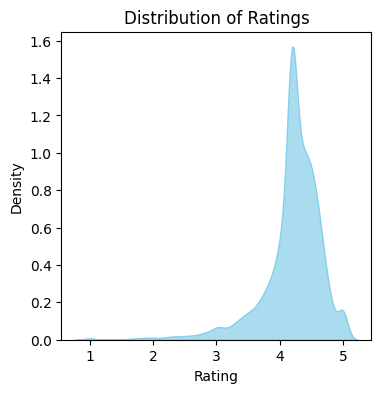

In [13]:
# Create a KDE plot to visualize the distribution of 'Rating'
plt.figure(figsize=(4, 4))  # Set the size of the chart (optional)
sns.kdeplot(data=df['Rating'], fill=True, color='skyblue', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings')
plt.show()


#### Reviews

In [14]:
#This indicated the number of reviews on Gplay store for an app, hence it should be numerical.
df['Reviews']=df['Reviews'].astype(int)

In [15]:
df['Reviews'].isna().sum()

0

There are no null values 

In [16]:
df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

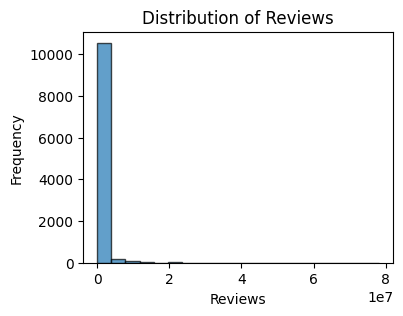

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Rating' column

# Create a histogram to visualize the distribution of 'Rating'
plt.figure(figsize=(4, 3))  # Set the size of the chart (optional)
plt.hist(df['Reviews'], bins=20, edgecolor='k', alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')
plt.show()


In [18]:


# Calculate z-scores for Reviews column
z_scores = np.abs((df['Reviews'] - df['Reviews'].mean()) / df['Reviews'].std())

# Set a threshold for z-score (e.g., 3.0)
threshold = 3.0

# Identify outliers based on z-score
outliers = df[z_scores > threshold]

# Alternatively, you can use the IQR method to identify outliers
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Reviews'] < Q1 - 1.5 * IQR) | (df['Reviews'] > Q3 + 1.5 * IQR)]


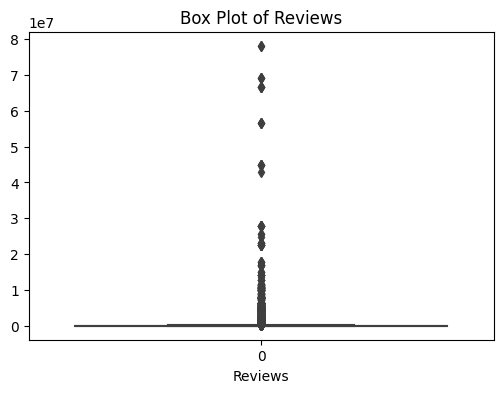

In [19]:

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Reviews'])
plt.xlabel('Reviews')
plt.title('Box Plot of Reviews')
plt.show()


#### Size


In [20]:

# Define a function to convert the size values to bytes
def convert_to_bytes(size_str):
    if size_str == "Varies with device":
        return None  # If size varies with device, set to None or NaN as appropriate
    size_str = size_str.strip()  # Remove leading/trailing whitespaces
    try:
        num_part, unit = size_str[:-1], size_str[-1]  # Extract the numeric part and unit
        num_part = float(num_part)  # Convert the numeric part to float
        if unit == "M":
            return int(num_part * 1024 * 1024)  # Convert megabytes to bytes
        elif unit == "k":
            return int(num_part * 1024)  # Convert kilobytes to bytes
    except (ValueError, IndexError):
        return None  # Return None for any other cases or if an error occurs during conversion

# Apply the function to the "Size" column to convert it to bytes
df["Size"] = df["Size"].apply(convert_to_bytes)

# Now, the "Size" column contains values in bytes (or None for "Varies with device" and unrecognized formats)
print(df["Size"])



0        19922944.0
1        14680064.0
2         9122611.0
3        26214400.0
4         2936012.0
            ...    
10836    55574528.0
10837     3774873.0
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10840, dtype: float64


In [21]:
df.Size.isna().sum()

1695

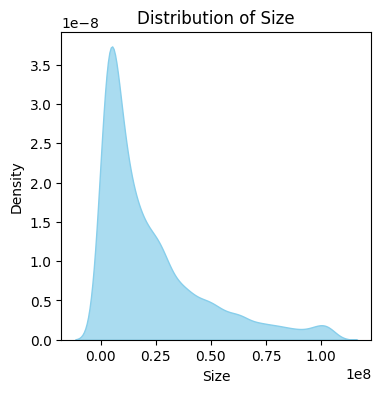

In [22]:
# Create a KDE plot to visualize the distribution of 'Rating'
plt.figure(figsize=(4, 4))  # Set the size of the chart (optional)
sns.kdeplot(data=df['Size'], fill=True, color='skyblue', alpha=0.7)
plt.xlabel('Size')
plt.ylabel('Density')
plt.title('Distribution of Size')
plt.show()


In [23]:
df.Size.describe()

count    9.145000e+03
mean     2.256133e+07
std      2.368637e+07
min      8.704000e+03
25%      5.138022e+06
50%      1.363149e+07
75%      3.145728e+07
max      1.048576e+08
Name: Size, dtype: float64

In [24]:
from sklearn.impute import KNNImputer

impute_data = df[['Size']]

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can choose the number of neighbors (e.g., 3, 5, 10)

# Perform KNN imputation directly on the DataFrame
df['Size'] = knn_imputer.fit_transform(impute_data)



In [25]:
df.Size.isna().sum()

0

#### Installs

In [26]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [27]:


# Convert the "Installs" column to numeric values
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Define bins and labels for the new column
bins = [0, 100000, 1000000, 10000000, df['Installs'].max()]
labels = ['Low', 'Moderate', 'High', 'Very High']

# Create a new column with logical bins
df['Installs Category'] = pd.cut(df['Installs'], bins=bins, labels=labels)



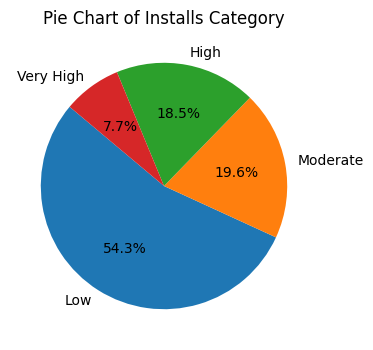

In [71]:


# Calculate the percentage of installs in each category
percentage_installs = df['Installs Category'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(4,4))  # Set the size of the chart (optional)
plt.pie(percentage_installs, labels=percentage_installs.index, autopct='%1.1f%%', startangle=140)

# Add a title to the chart
plt.title('Pie Chart of Installs Category')

# Display the chart
plt.show()



-  "Low" (less than 100,000 installations), "Moderate" (100,000 to 1,000,000 installations), "High" (1,000,000 to 10,000,000 installations), and "Very High" (exceeding 10,000,000 installations).
-  54.3% of the apps falls in the Low Category
-  Only 7.6% apps fall in the High Category

#### Type and Price

In [29]:
#Sanity Check
# Check if all the rows with 'type' value 'free' also have 'price' value 0

# Get rows with 'type' value 'free' but 'price' is not 0
failing_rows = df[(df['Type'] == 'free') & (df['Price'] != 0)]

# Print the failing rows
print(failing_rows)


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Installs Category]
Index: []


In [30]:
#Converting the Price column to float type
df["Price"] = df["Price"].str.replace("$", "").astype(float)


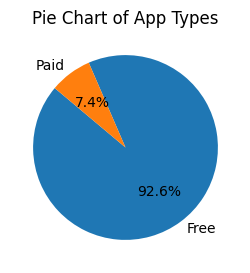

In [31]:
# Count the occurrences of each type
type_counts = df['Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(3, 3))  # Set the size of the chart (optional)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title to the chart
plt.title('Pie Chart of App Types')
plt.show()

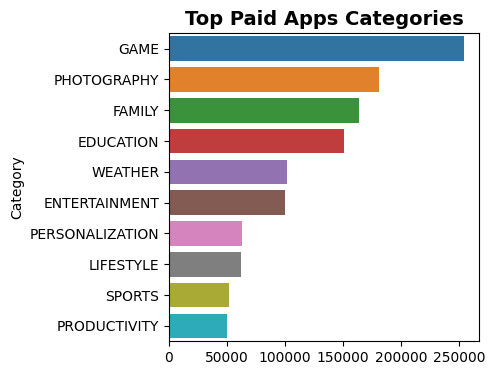

In [32]:
# Top paid Apps Category
plt.figure(figsize=(4, 4))
x=df[df["Type"]=="Paid"]
y=x.groupby("Category").Installs.mean().sort_values(ascending=False).head(10)
sns.barplot(x=y.values,y=y.index)
plt.title("Top Paid Apps Categories", fontdict= { 'fontsize': 14,'fontweight':'bold'})
plt.show()



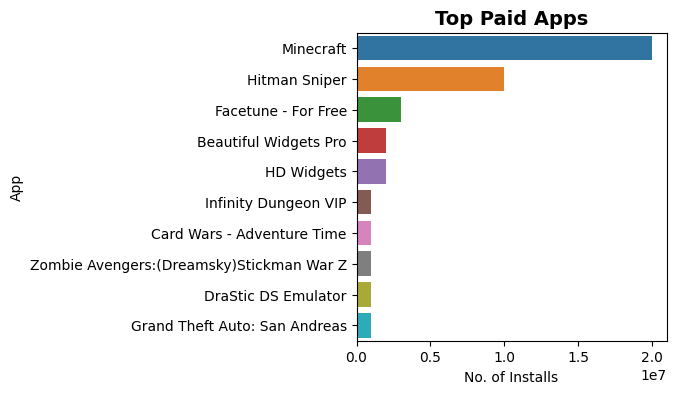

In [33]:
# Top paid Apps
plt.figure(figsize=(4, 4))
x=df[df["Type"]=="Paid"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(x=y.values,y=y.index)
plt.title("Top Paid Apps", fontdict= { 'fontsize': 14,'fontweight':'bold'})
plt.xlabel("No. of Installs")
plt.show()


#### Content Rating, Genre & Android Version

In [34]:
# Checking if there is any null values in these columns
print(df["Content Rating"].isna().sum())
print(df["Genres"].isna().sum())
print(df["Android Ver"].isna().sum())
df.dropna(subset=["Android Ver"], inplace=True)


0
0
2


In [35]:
df1= df[df["Installs Category"].isna()]
df1["Installs"].mean()

0.0

Let's drop the Apps with 0 installs

In [36]:
df.dropna(subset=["Installs Category"], inplace=True)


In [37]:
#Final data after preprocessing 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10823 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10823 non-null  object  
 1   Category           10823 non-null  object  
 2   Rating             10823 non-null  float64 
 3   Reviews            10823 non-null  int32   
 4   Size               10823 non-null  float64 
 5   Installs           10823 non-null  int32   
 6   Type               10823 non-null  object  
 7   Price              10823 non-null  float64 
 8   Content Rating     10823 non-null  object  
 9   Genres             10823 non-null  object  
 10  Last Updated       10823 non-null  object  
 11  Current Ver        10815 non-null  object  
 12  Android Ver        10823 non-null  object  
 13  Installs Category  10823 non-null  category
dtypes: category(1), float64(3), int32(2), object(8)
memory usage: 1.1+ MB


### Modelling - Clustering ( using KMeans)

In [38]:
#drop columns that we are not going to use
df1=df.drop(labels=["Current Ver","Android Ver","App"],axis=1)

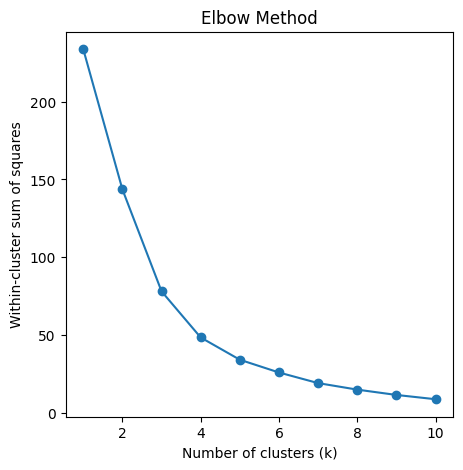

In [50]:

selected_columns = ['Rating', 'Installs']
df_selected = df1[selected_columns].dropna()

# Step 3: Feature Scaling
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)

# Step 4: Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\Avnish\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

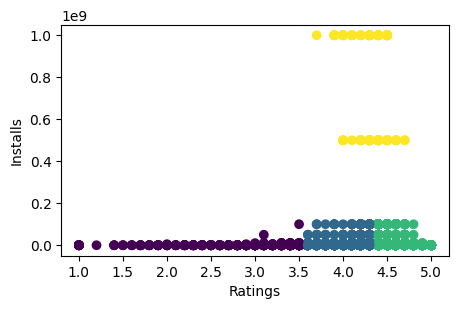

In [69]:


k = 4  # Using Scree plot above
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_selected)

# Step 6: Visualize the clusters
plt.figure(figsize=(5, 3))
plt.scatter(df['Rating'], df['Installs'], c=df['Cluster'])
plt.xlabel("Ratings")
plt.ylabel("Installs")
plt


In [55]:
cluster_stats = df.groupby('Cluster')[['Rating', 'Installs']].agg(['mean', 'std', 'count'])
print(cluster_stats)


           Rating                      Installs                    
             mean       std count          mean           std count
Cluster                                                            
0        3.003683  0.540678   896  7.142877e+05  4.111771e+06   896
1        4.105245  0.182430  5791  4.883060e+06  1.599386e+07  5791
2        4.578607  0.171384  4006  1.116216e+07  2.655563e+07  4006
3        4.309231  0.186126   130  7.230769e+08  2.495076e+08   130


In [67]:
# Replace these labels with your chosen labels based on the cluster characteristics
cluster_labels = {
    0: 'Low Rating,Low Installs',
    1: 'Medium Rating, Medium Installs',
    2: 'High Rating, Low Installs',
    3: 'High Rating, High Installs',
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)


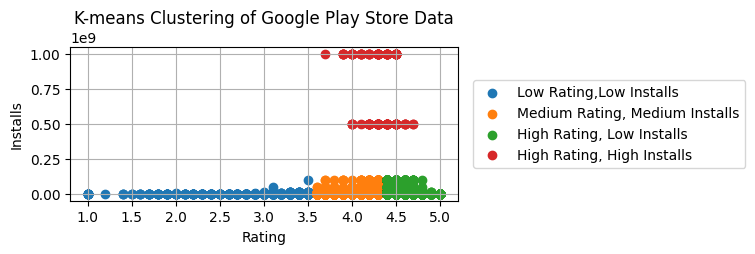

In [70]:
plt.figure(figsize=(5, 2))
for cluster_id, cluster_label in cluster_labels.items():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Rating'], cluster_data['Installs'], label=cluster_label)

plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('K-means Clustering of Google Play Store Data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()




